In [1]:
#import the import modules
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn import preprocessing
from pandas import get_dummies
from sklearn import datasets
from sklearn.svm import SVC
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

In [2]:
import seaborn as sb
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import dataset
data=pd.read_csv('C:\\Titanic.csv', index_col=0)

In [4]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,True


In [10]:
data.columns

Index([u'survived', u'pclass', u'sex', u'age', u'sibsp', u'parch', u'fare',
       u'class', u'who', u'adult_male', u'deck', u'embark_town', u'alone'],
      dtype='object')

In [13]:
data.drop(['alive','embarked'],axis=1,inplace=True)
data.head(1)

KeyError: "['alive' 'embarked'] not found in axis"

In [14]:
#view missing columns
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

In [15]:
data.shape

(891, 13)

In [16]:
891-177

714

In [17]:
data.drop(['deck'],axis=1,inplace=True)

In [18]:
data

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,Southampton,True
5,0,3,male,NaN,0,0,8.4583,Third,man,True,Queenstown,True
6,0,1,male,54.0,0,0,51.8625,First,man,True,Southampton,True
7,0,3,male,2.0,3,1,21.0750,Third,child,False,Southampton,False
8,1,3,female,27.0,0,2,11.1333,Third,woman,False,Southampton,False
9,1,2,female,14.0,1,0,30.0708,Second,child,False,Cherbourg,False


In [19]:
data['age'].fillna(method='bfill', inplace=True)

In [20]:
data['embark_town'].fillna(method='bfill', inplace=True)

In [21]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [22]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.870561,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.597668,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,Southampton,True
5,0,3,male,54.0,0,0,8.4583,Third,man,True,Queenstown,True
6,0,1,male,54.0,0,0,51.8625,First,man,True,Southampton,True
7,0,3,male,2.0,3,1,21.0750,Third,child,False,Southampton,False
8,1,3,female,27.0,0,2,11.1333,Third,woman,False,Southampton,False
9,1,2,female,14.0,1,0,30.0708,Second,child,False,Cherbourg,False


In [24]:
data.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

Text(0.5,1,'countplot of those that survived')

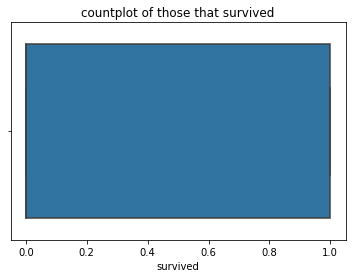

In [26]:
sb.boxplot(x='survived', data=data)
plt.title('countplot of those that survived')

In [28]:
sb.jointplot(x='survived', data=data)
plt.title('countplot of those that survived')

TypeError: jointplot() takes at least 2 arguments (2 given)

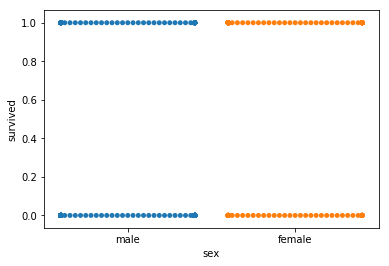

In [39]:
+sb.swarmplot(x='sex', y='survived', data=data)

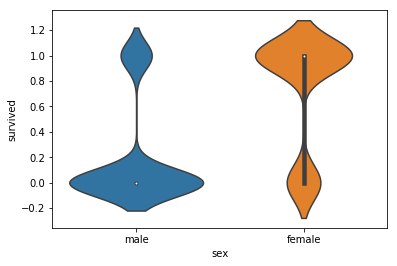

In [37]:
sb.violinplot(x='sex', y='survived', data=data)

In [41]:
view=data[data['survived']==1]
view.sex.value_counts()

female    233
male      109
Name: sex, dtype: int64

In [42]:
# no of gender specifics in the ship
data.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [43]:
view=data[data['survived']==0]
view.sex.value_counts()

male      468
female     81
Name: sex, dtype: int64

In [44]:
data.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.055505,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.295367,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.055505,-0.295367,1.000000,-0.204810,-0.161386,0.085406,0.213344,0.158073
sibsp,-0.035322,0.083081,-0.204810,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.161386,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.085406,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.213344,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.158073,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [45]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,Southampton,True


In [46]:
data.sex.replace({'male':1, 'female':0}, inplace=True)

In [47]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,Third,man,True,Southampton,False
1,1,1,0,38.0,1,0,71.2833,First,woman,False,Cherbourg,False
2,1,3,0,26.0,0,0,7.9250,Third,woman,False,Southampton,True
3,1,1,0,35.0,1,0,53.1000,First,woman,False,Southampton,False
4,0,3,1,35.0,0,0,8.0500,Third,man,True,Southampton,True


In [48]:
data['class']=data['class'].astype('category')

In [49]:
data['class']=data['class'].cat.codes

In [50]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,2,man,True,Southampton,False
1,1,1,0,38.0,1,0,71.2833,0,woman,False,Cherbourg,False
2,1,3,0,26.0,0,0,7.9250,2,woman,False,Southampton,True
3,1,1,0,35.0,1,0,53.1000,0,woman,False,Southampton,False
4,0,3,1,35.0,0,0,8.0500,2,man,True,Southampton,True


In [51]:
def category(column,data):
    data[column]=data[column].astype('category')
    data[column]=data[column].cat.codes
    return data

In [53]:
category('who', data)
category('adult_male', data)
category('embark_town', data)
category('alone', data)


,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,2,1,1,2,0
1,1,1,0,38.0,1,0,71.2833,0,2,0,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,0,2,1
3,1,1,0,35.0,1,0,53.1000,0,2,0,2,0
4,0,3,1,35.0,0,0,8.0500,2,1,1,2,1
5,0,3,1,54.0,0,0,8.4583,2,1,1,1,1
6,0,1,1,54.0,0,0,51.8625,0,1,1,2,1
7,0,3,1,2.0,3,1,21.0750,2,0,0,2,0
8,1,3,0,27.0,0,2,11.1333,2,2,0,2,0
9,1,2,0,14.0,1,0,30.0708,1,0,0,0,0


In [116]:
data.age.value_counts()

24.00    38
18.00    35
22.00    31
28.00    30
25.00    30
30.00    29
21.00    29
36.00    29
19.00    28
29.00    28
35.00    26
32.00    24
33.00    21
23.00    20
27.00    19
16.00    19
31.00    19
26.00    19
40.00    19
34.00    18
20.00    17
17.00    16
44.00    16
45.00    16
39.00    16
38.00    15
42.00    15
50.00    14
4.00     13
9.00     11
         ..
0.92      3
30.50     3
6.00      3
32.50     3
40.50     3
61.00     3
45.50     3
63.00     3
64.00     2
70.00     2
80.00     2
57.00     2
55.00     2
13.00     2
10.00     2
28.50     2
23.50     2
59.00     2
20.50     1
53.00     1
55.50     1
36.50     1
12.00     1
24.50     1
14.50     1
70.50     1
34.50     1
74.00     1
0.67      1
0.42      1
Name: age, Length: 88, dtype: int64

In [118]:
data['young and rich']=0
data['young and poor']=0
data['young and middle']=0
data['old and rich']=0
data['old and poor']=0
data['old and middle']=0
data.loc[((data['age']<=40)%(data['class']==1)),'young and middle']=1
data.loc[((data['age']<=40)%(data['class']==0)),'young and poor']=1
data.loc[((data['age']<=40)%(data['class']==2)),'young and rich']=1

data.loc[((data['age']>=40)%(data['class']==1)),'old and middle']=1
data.loc[((data['age']>=40)%(data['class']==0)),'old and poor']=1
data.loc[((data['age']>=40)%(data['class']==2)),'old and rich']=1


In [119]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone,young and rich,young and poor,young and middle,old and rich,old and poor,old and middle
0,0,3,1,22.0,1,0,7.2500,2,1,1,2,0,1,1,1,1,1,1
1,1,1,0,38.0,1,0,71.2833,0,2,0,0,0,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,0,2,1,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,0,2,0,2,0,0,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,2,1,1,2,1,0,0,0,0,0,0


In [120]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=12)


In [121]:
model=RandomForestClassifier(random_state=12)

In [122]:
type(model)

sklearn.ensemble.forest.RandomForestClassifier

In [123]:
from sklearn.model_selection import train_test_split

In [125]:
X =data.drop(['survived'], axis=1)
y =data['survived']
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.3)

In [126]:
y_train,

(617    0
 818    0
 486    1
 641    1
 812    0
 213    0
 511    0
 328    1
 490    0
 763    1
 246    0
 521    0
 544    0
 528    0
 857    1
 415    0
 154    0
 188    0
 781    1
 772    0
 635    1
 722    0
 395    0
 6      0
 868    0
 69     0
 560    0
 268    1
 607    1
 189    0
       ..
 825    0
 61     1
 793    0
 801    1
 559    1
 723    0
 876    0
 524    0
 318    1
 766    0
 389    1
 791    0
 403    0
 445    1
 23     1
 585    1
 849    1
 219    0
 817    0
 251    0
 623    0
 770    0
 271    1
 67     0
 856    1
 319    1
 371    0
 64     0
 77     0
 731    0
 Name: survived, Length: 623, dtype: int64,)

In [127]:
y_test

296    0
563    0
170    0
298    1
119    0
444    1
151    1
626    0
447    1
12     0
602    0
618    1
375    1
123    1
327    1
236    0
455    1
245    0
27     0
367    1
372    0
811    0
472    1
25     1
35     0
886    0
667    0
712    1
418    0
369    1
      ..
133    1
592    0
21     1
553    1
624    0
458    1
554    1
341    1
204    1
457    1
659    0
297    0
194    1
19     1
1      1
567    0
530    1
299    1
348    1
45     0
75     0
201    0
470    0
111    0
28     1
363    0
657    0
197    0
392    0
728    0
Name: survived, Length: 268, dtype: int64

In [135]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [136]:
predictions=model.predict(x_test)
pred=pd.DataFrame({'Original value':y_test,
                 'Predicted values':predictions})

In [137]:
model.score(x_test,y_test)

0.7761194029850746

In [134]:
x_test

,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone,young and rich,young and poor,young and middle,old and rich,old and poor,old and middle
296,3,1,23.5,0,0,7.2292,2,1,1,0,1,0,0,0,0,0,0
563,3,1,24.0,0,0,8.0500,2,1,1,2,1,0,0,0,0,0,0
170,1,1,61.0,0,0,33.5000,0,1,1,2,1,0,0,0,0,0,0
298,1,1,50.0,0,0,30.5000,0,1,1,2,1,0,0,0,0,0,0
119,3,0,2.0,4,2,31.2750,2,0,0,2,0,0,0,0,0,0,0
444,3,1,4.0,0,0,8.1125,2,1,1,2,1,0,0,0,0,0,0
151,1,0,22.0,1,0,66.6000,0,2,0,2,0,0,0,0,0,0,0
626,2,1,57.0,0,0,12.3500,1,1,1,1,1,0,0,0,0,0,0
447,1,1,34.0,0,0,26.5500,0,1,1,2,1,0,0,0,0,0,0
12,3,1,20.0,0,0,8.0500,2,1,1,2,1,0,0,0,0,0,0
